Compare learned Q-learning states to optimal Sprague-Grundy

In [1]:
from q import Q

q = Q()
q.train(num_games=100000, num_heaps=2)
list(q.q.items())[:10]

Game 0
Game 10000
Game 20000
Game 30000
Game 40000
Game 50000
Game 60000
Game 70000
Game 80000
Game 90000
Training complete.


[(((10, 3), (0, 1)), -1.686779483654174),
 (((8, 3), (0, 4)), -0.7442368225336986),
 (((2, 3), (0, 2)), -0.9093748269136995),
 (((9, 3), (0, 1)), -1.8909567904794504),
 (((4, 3), (0, 2)), -1.881444996246528),
 (((0, 3), (1, 3)), 1.0),
 (((4, 10), (1, 2)), -1.7733230527186299),
 (((4, 5), (1, 2)), -1.3653168566209066),
 (((2, 3), (0, 1)), -1.899535531241272),
 (((4, 8), (1, 3)), -1.7799533201342863)]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
def move(heaps, action): # action is a tuple (heap, num)
    heap, num = action
    heaps[heap] -= num
    return heaps

In [11]:
# add all state action pairs to a single result state

result = []

for state, action in q.q:
    heaps = list(state)
    result.append([move(heaps, action), q.q[(state, action)]])# 

result[:10]

[[[9, 3], -1.686779483654174],
 [[4, 3], -0.7442368225336986],
 [[0, 3], -0.9093748269136995],
 [[8, 3], -1.8909567904794504],
 [[2, 3], -1.881444996246528],
 [[0, 0], 1.0],
 [[4, 8], -1.7733230527186299],
 [[4, 3], -1.3653168566209066],
 [[1, 3], -1.899535531241272],
 [[4, 5], -1.7799533201342863]]

In [14]:
# create array of all possible states and fill in with Q values
arr = np.full((11, 11), np.nan)

for state, q_value in result:
    arr[state[0], state[1]] = q_value
    
arr

array([[ 1.        , -1.        , -0.81868896, -1.        , -0.81799774,
        -0.63652344, -0.99902344, -0.9375    , -0.9980957 , -0.99975586,
        -0.9375    ],
       [-0.99609375,  1.9       , -1.85546513, -1.89246605, -1.89953613,
        -1.89252014, -1.89976807, -1.425     , -1.721875  , -1.32282227,
        -1.840625  ],
       [-0.83359375, -1.78122078,  1.89999997, -0.94215852, -1.8896673 ,
        -1.53645712, -1.22200543,  0.40853943, -1.32301991, -1.8663897 ,
        -1.56732782],
       [-0.75      ,  0.0296875 , -1.31834289,  1.9014251 , -1.86931175,
        -1.82722066, -0.55813825, -1.72087404, -1.78089775, -1.43141688,
        -1.58429469],
       [-0.99902344, -1.89257812, -1.58923862, -1.59434361,  2.31601953,
         0.396529  , -0.24794278, -0.53871454, -1.86518701, -0.67587225,
        -1.44891621],
       [-0.95273438, -0.94098885, -1.74820734, -1.86508507, -1.87586992,
         1.90292701, -1.86369457, -1.77445411, -1.02311858, -0.79455003,
        -1.286

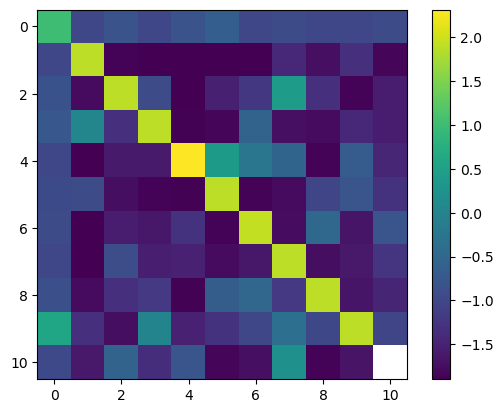

In [15]:
# visualize patterns

plt.imshow(arr)
plt.colorbar()

^ found the most optimal game states!! (along diagonal)

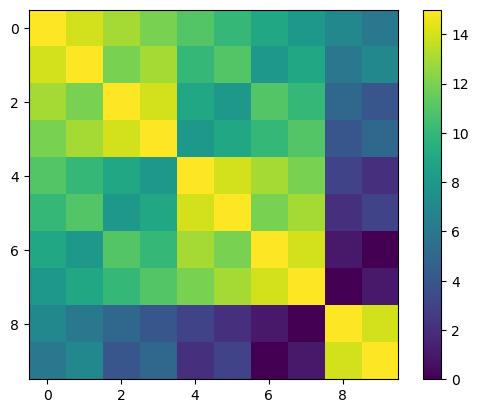

In [23]:
# compare with optimal strategy; diagonal has similar values

x = 10; y = 10
arr2 = np.full((x,y), -1)  # initialize with -1

for row in range(x):
    for col in range(y):
        arr2[row,col] = row^col
        
# most optimal if closer to XOR of 0; invert to make it more intuitive
arr2 = max(arr2.flatten()) - arr2
            
plt.imshow(arr2)
plt.colorbar()